# Import Libraries

In [1]:
import numpy as np
import pandas as pd

# Loading the Data and Selecting the Features

### Import Data

In [2]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0)

### Explore Data

In [3]:
loan_data_inputs_train.head()

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
427211      427211  12796369   14818505      24000        24000   
206088      206088   1439740    1691948      10000        10000   
136020      136020   5214749    6556909      20425        20425   
412305      412305  13827698   15890016      17200        17200   
36159        36159    422455     496525       8400         8400   

        funded_amnt_inv        term  int_rate  installment grade  ...  \
427211          24000.0   36 months      8.90       762.08     A  ...   
206088          10000.0   36 months     14.33       343.39     C  ...   
136020          20425.0   36 months      8.90       648.56     A  ...   
412305          17200.0   36 months     16.59       609.73     D  ...   
36159            7450.0   36 months     12.84       282.40     C  ...   

       dti:21.7-22.4 dti:22.4-35 dti:>35 mths_since_last_record:Missing  \
427211             1           0       0                              1   
206088             0           0       0                              1   
136020             0           0       0                              1   
412305             0           0       0                              1   
36159              0           1       0                              1   

        mths_since_last_record:0-2 mths_since_last_record:3-20  \
427211                           0                           0   
206088                           0                           0   
136020                           0                           0   
412305                           0                           0   
36159                            0                           0   

       mths_since_last_record:21-31 mths_since_last_record:32-80  \
427211                            0                            0   
206088                            0                            0   
136020                            0                            0   
412305                            0                            0   
36159                             0                            0   

       mths_since_last_record:81-86 mths_since_last_record:>86  
427211                            0                          0  
206088                            0                          0  
136020                            0                          0  
412305                            0                          0  
36159                             0                          0  

[5 rows x 324 columns]

In [4]:
loan_data_targets_train.head()

good_bad
427211         1
206088         1
136020         1
412305         0
36159          0

In [5]:
loan_data_inputs_train.shape

(373028, 324)

In [6]:
loan_data_targets_train.shape

(373028, 1)

In [7]:
loan_data_inputs_test.shape

(93257, 324)

In [8]:
loan_data_targets_test.shape

(93257, 1)

### Selecting the Features

In [9]:
# Here we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [10]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [11]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories. 
inputs_train.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
427211     True    False    False    False    False    False   
206088    False    False     True    False    False    False   
136020     True    False    False    False    False    False   
412305    False    False    False     True    False    False   
36159     False    False     True    False    False    False   

        home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
427211               False                     True                 0   
206088               False                     True                 0   
136020               False                     True                 0   
412305               False                    False                 0   
36159                False                     True                 0   

        addr_state:NY  ...  mths_since_last_delinq:Missing  \
427211          False  ...                               1   
206088          False  ...                               0   
136020          False  ...                               0   
412305          False  ...                               0   
36159           False  ...                               1   

        mths_since_last_delinq:4-30  mths_since_last_delinq:31-56  \
427211                            0                             0   
206088                            1                             0   
136020                            0                             1   
412305                            1                             0   
36159                             0                             0   

        mths_since_last_delinq:>=57  mths_since_last_record:Missing  \
427211                            0                               1   
206088                            0                               1   
136020                            0                               1   
412305                            0                               1   
36159                             0                               1   

        mths_since_last_record:3-20  mths_since_last_record:21-31  \
427211                            0                             0   
206088                            0                             0   
136020                            0                             0   
412305                            0                             0   
36159                             0                             0   

        mths_since_last_record:32-80  mths_since_last_record:81-86  \
427211                             0                             0   
206088                             0                             0   
136020                             0                             0   
412305                             0                             0   
36159                              0                             0   

        mths_since_last_record:>86  
427211                           0  
206088                           0  
136020                           0  
412305                           0  
36159                            0  

[5 rows x 104 columns]

# PD Model Estimation

## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [13]:
reg = LogisticRegression()
# We create an instance of an object from the 'LogisticRegression' class.

In [14]:
pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [15]:
reg.fit(inputs_train, loan_data_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

C:\Users\lin48\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lin48\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
reg.intercept_
# Displays the intercept contain in the estimated ("fitted") object from the 'LogisticRegression' class.

array([-1.3000709])

In [17]:
reg.coef_
# Displays the coefficients contained in the estimated ("fitted") object from the 'LogisticRegression' class.

array([[ 1.15931298,  0.910423  ,  0.7124428 ,  0.51834463,  0.33766675,
         0.1493867 ,  0.09207814,  0.10669115,  0.03221081,  0.05420254,
         0.05524439,  0.05796643,  0.0732633 ,  0.13179673,  0.09577987,
         0.18029249,  0.22188123,  0.2208375 ,  0.25836095,  0.31659713,
         0.51932162,  0.08691634, -0.00884211,  0.30466652,  0.20068155,
         0.21300727,  0.26636185,  0.0544452 ,  0.07940847,  0.09973259,
         0.1239945 ,  0.08910554,  0.05858443,  0.12226569,  0.97519451,
         0.7971714 ,  0.7168113 ,  0.53078746,  0.37504745,  0.13073313,
        -0.07033955,  0.85344083,  0.53533191,  0.28965459,  0.10310248,
         0.03324161,  0.03331587,  0.0817    ,  0.11253616,  0.1117842 ,
         0.05920293,  0.01831172,  0.6206457 ,  0.47688141,  0.26843084,
        -0.00593738, -0.10543754, -0.1318323 , -0.14736831, -0.15586964,
        -0.12364209, -0.20645056,  0.12616461,  0.1758868 , -0.02160486,
         0.02094317,  0.21960771,  0.03808048,  0.0

In [18]:
feature_name = inputs_train.columns.values
# Stores the names of the columns of a dataframe in a variable.

In [19]:
feature_name

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:OWN', 'home_ownership:MORTGAGE',
       'addr_state:NM_VA', 'addr_state:NY',
       'addr_state:OK_TN_MO_LA_MD_NC', 'addr_state:CA',
       'addr_state:UT_KY_AZ_NJ', 'addr_state:AR_MI_PA_OH_MN',
       'addr_state:RI_MA_DE_SD_IN', 'addr_state:GA_WA_OR',
       'addr_state:WI_MT', 'addr_state:TX', 'addr_state:IL_CT',
       'addr_state:KS_SC_CO_VT_AK_MS', 'addr_state:WV_NH_WY_DC_ME_ID',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:credit_card',
       'purpose:debt_consolidation', 'purpose:oth__med__vacation',
       'purpose:major_purch__car__home_impr', 'initial_list_status:w',
       'term:36', 'emp_length:1', 'emp_length:2-4', 'emp_length:5-6',
       'emp_length:7-9', 'emp_length:10', 'mths_since_issue_d:<38',
       'mths_since_issue_d:38-39', 'mths_since_issue_d:40-41',
       'mths_since_issue_d:42-48', 'mths_since_issue_d:49-52',
 

In [20]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
summary_table

Feature name  Coefficients
0                              Intercept     -1.300071
1                                grade:A      1.159313
2                                grade:B      0.910423
3                                grade:C      0.712443
4                                grade:D      0.518345
5                                grade:E      0.337667
6                                grade:F      0.149387
7                     home_ownership:OWN      0.092078
8                home_ownership:MORTGAGE      0.106691
9                       addr_state:NM_VA      0.032211
10                         addr_state:NY      0.054203
11          addr_state:OK_TN_MO_LA_MD_NC      0.055244
12                         addr_state:CA      0.057966
13                addr_state:UT_KY_AZ_NJ      0.073263
14             addr_state:AR_MI_PA_OH_MN      0.131797
15             addr_state:RI_MA_DE_SD_IN      0.095780
16                   addr_state:GA_WA_OR      0.180292
17                      addr_state:WI_MT      0.221881
18                         addr_state:TX      0.220838
19                      addr_state:IL_CT      0.258361
20          addr_state:KS_SC_CO_VT_AK_MS      0.316597
21          addr_state:WV_NH_WY_DC_ME_ID      0.519322
22      verification_status:Not Verified      0.086916
23   verification_status:Source Verified     -0.008842
24                   purpose:credit_card      0.304667
25            purpose:debt_consolidation      0.200682
26            purpose:oth__med__vacation      0.213007
27   purpose:major_purch__car__home_impr      0.266362
28                 initial_list_status:w      0.054445
29                               term:36      0.079408
30                          emp_length:1      0.099733
31                        emp_length:2-4      0.123995
32                        emp_length:5-6      0.089106
33                        emp_length:7-9      0.058584
34                         emp_length:10      0.122266
35                mths_since_issue_d:<38      0.975195
36              mths_since_issue_d:38-39      0.797171
37              mths_since_issue_d:40-41      0.716811
38              mths_since_issue_d:42-48      0.530787
39              mths_since_issue_d:49-52      0.375047
40              mths_since_issue_d:53-64      0.130733
41              mths_since_issue_d:65-84     -0.070340
42                       int_rate:<9.548      0.853441
43                 int_rate:9.548-12.025      0.535332
44                 int_rate:12.025-15.74      0.289655
45                 int_rate:15.74-20.281      0.103102
46   mths_since_earliest_cr_line:141-164      0.033242
47   mths_since_earliest_cr_line:165-247      0.033316
48   mths_since_earliest_cr_line:248-270      0.081700
49   mths_since_earliest_cr_line:271-352      0.112536
50      mths_since_earliest_cr_line:>352      0.111784
51                         delinq_2yrs:0      0.059203
52                       delinq_2yrs:1-3      0.018312
53                      inq_last_6mths:0      0.620646
54                    inq_last_6mths:1-2      0.476881
55                    inq_last_6mths:3-6      0.268431
56                          open_acc:1-3     -0.005937
57                         open_acc:4-12     -0.105438
58                        open_acc:13-17     -0.131832
59                        open_acc:18-22     -0.147368
60                        open_acc:23-25     -0.155870
61                        open_acc:26-30     -0.123642
62                         open_acc:>=31     -0.206451
63                           pub_rec:3-4      0.126165
64                           pub_rec:>=5      0.175887
65                       total_acc:28-51     -0.021605
66                        total_acc:>=52      0.020943
67                    acc_now_delinq:>=1      0.219608
68               total_rev_hi_lim:5K-10K      0.038080
69              total_rev_hi_lim:10K-20K      0.008410
70              total_rev_hi_lim:20K-30K      0.009998
71              total_rev_hi_lim:30K-40K      0.024274
72           

## Building Model with P values

In [21]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        F_ij = F_ij.astype(float)
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [22]:
reg = LogisticRegression_with_p_values()
# We create an instance of an object from the newly created 'LogisticRegression_with_p_values()' class.

In [23]:
reg.fit(inputs_train, loan_data_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

C:\Users\lin48\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lin48\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

Feature name  Coefficients
0                              Intercept     -1.300071
1                                grade:A      1.159313
2                                grade:B      0.910423
3                                grade:C      0.712443
4                                grade:D      0.518345
5                                grade:E      0.337667
6                                grade:F      0.149387
7                     home_ownership:OWN      0.092078
8                home_ownership:MORTGAGE      0.106691
9                       addr_state:NM_VA      0.032211
10                         addr_state:NY      0.054203
11          addr_state:OK_TN_MO_LA_MD_NC      0.055244
12                         addr_state:CA      0.057966
13                addr_state:UT_KY_AZ_NJ      0.073263
14             addr_state:AR_MI_PA_OH_MN      0.131797
15             addr_state:RI_MA_DE_SD_IN      0.095780
16                   addr_state:GA_WA_OR      0.180292
17                      addr_state:WI_MT      0.221881
18                         addr_state:TX      0.220838
19                      addr_state:IL_CT      0.258361
20          addr_state:KS_SC_CO_VT_AK_MS      0.316597
21          addr_state:WV_NH_WY_DC_ME_ID      0.519322
22      verification_status:Not Verified      0.086916
23   verification_status:Source Verified     -0.008842
24                   purpose:credit_card      0.304667
25            purpose:debt_consolidation      0.200682
26            purpose:oth__med__vacation      0.213007
27   purpose:major_purch__car__home_impr      0.266362
28                 initial_list_status:w      0.054445
29                               term:36      0.079408
30                          emp_length:1      0.099733
31                        emp_length:2-4      0.123995
32                        emp_length:5-6      0.089106
33                        emp_length:7-9      0.058584
34                         emp_length:10      0.122266
35                mths_since_issue_d:<38      0.975195
36              mths_since_issue_d:38-39      0.797171
37              mths_since_issue_d:40-41      0.716811
38              mths_since_issue_d:42-48      0.530787
39              mths_since_issue_d:49-52      0.375047
40              mths_since_issue_d:53-64      0.130733
41              mths_since_issue_d:65-84     -0.070340
42                       int_rate:<9.548      0.853441
43                 int_rate:9.548-12.025      0.535332
44                 int_rate:12.025-15.74      0.289655
45                 int_rate:15.74-20.281      0.103102
46   mths_since_earliest_cr_line:141-164      0.033242
47   mths_since_earliest_cr_line:165-247      0.033316
48   mths_since_earliest_cr_line:248-270      0.081700
49   mths_since_earliest_cr_line:271-352      0.112536
50      mths_since_earliest_cr_line:>352      0.111784
51                         delinq_2yrs:0      0.059203
52                       delinq_2yrs:1-3      0.018312
53                      inq_last_6mths:0      0.620646
54                    inq_last_6mths:1-2      0.476881
55                    inq_last_6mths:3-6      0.268431
56                          open_acc:1-3     -0.005937
57                         open_acc:4-12     -0.105438
58                        open_acc:13-17     -0.131832
59                        open_acc:18-22     -0.147368
60                        open_acc:23-25     -0.155870
61                        open_acc:26-30     -0.123642
62                         open_acc:>=31     -0.206451
63                           pub_rec:3-4      0.126165
64                           pub_rec:>=5      0.175887
65                       total_acc:28-51     -0.021605
66                        total_acc:>=52      0.020943
67                    acc_now_delinq:>=1      0.219608
68               total_rev_hi_lim:5K-10K      0.038080
69              total_rev_hi_lim:10K-20K      0.008410
70              total_rev_hi_lim:20K-30K      0.009998
71              total_rev_hi_lim:30K-40K      0.024274
72           

In [25]:
# This is a list.
p_values = reg.p_values
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.

In [26]:
p_values

[1.910899842879372e-37,
 5.2056476041090245e-50,
 3.554887776563854e-36,
 6.2712055831318435e-22,
 2.18488689087244e-12,
 0.002880720278631118,
 5.072471644155805e-06,
 4.564035997058158e-17,
 0.31546175315114566,
 0.025773445793129707,
 0.017392169041683076,
 0.006414601735453786,
 0.0033554233880781856,
 5.519094731583416e-09,
 0.0013590692717711018,
 1.5485862728891544e-11,
 2.8555563528434435e-06,
 2.27033210873533e-17,
 1.1007310084070928e-18,
 1.2068767864188566e-24,
 1.8497728132117121e-22,
 3.5590295764497198e-09,
 0.5116499802600097,
 1.0118885926033694e-26,
 1.8319511221499335e-14,
 9.486409320418835e-12,
 2.159515090061959e-17,
 3.1181224906986994e-05,
 2.2686711160271115e-08,
 0.00012323166139030015,
 5.346457263731733e-11,
 3.19249138608732e-05,
 0.004885006306343012,
 3.458311268844528e-11,
 1.2192820683726077e-174,
 2.1745083376836865e-95,
 2.7990554374576395e-92,
 1.282157976646212e-63,
 4.276593415678839e-29,
 3.5802322334621695e-05,
 0.02326791472016448,
 3.5098141336

In [27]:
# Add the intercept for completeness.
p_values = np.append(np.nan, np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.

In [28]:
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.

In [29]:
summary_table

Feature name  Coefficients       p_values
0                              Intercept     -1.300071            NaN
1                                grade:A      1.159313   1.910900e-37
2                                grade:B      0.910423   5.205648e-50
3                                grade:C      0.712443   3.554888e-36
4                                grade:D      0.518345   6.271206e-22
5                                grade:E      0.337667   2.184887e-12
6                                grade:F      0.149387   2.880720e-03
7                     home_ownership:OWN      0.092078   5.072472e-06
8                home_ownership:MORTGAGE      0.106691   4.564036e-17
9                       addr_state:NM_VA      0.032211   3.154618e-01
10                         addr_state:NY      0.054203   2.577345e-02
11          addr_state:OK_TN_MO_LA_MD_NC      0.055244   1.739217e-02
12                         addr_state:CA      0.057966   6.414602e-03
13                addr_state:UT_KY_AZ_NJ      0.073263   3.355423e-03
14             addr_state:AR_MI_PA_OH_MN      0.131797   5.519095e-09
15             addr_state:RI_MA_DE_SD_IN      0.095780   1.359069e-03
16                   addr_state:GA_WA_OR      0.180292   1.548586e-11
17                      addr_state:WI_MT      0.221881   2.855556e-06
18                         addr_state:TX      0.220838   2.270332e-17
19                      addr_state:IL_CT      0.258361   1.100731e-18
20          addr_state:KS_SC_CO_VT_AK_MS      0.316597   1.206877e-24
21          addr_state:WV_NH_WY_DC_ME_ID      0.519322   1.849773e-22
22      verification_status:Not Verified      0.086916   3.559030e-09
23   verification_status:Source Verified     -0.008842   5.116500e-01
24                   purpose:credit_card      0.304667   1.011889e-26
25            purpose:debt_consolidation      0.200682   1.831951e-14
26            purpose:oth__med__vacation      0.213007   9.486409e-12
27   purpose:major_purch__car__home_impr      0.266362   2.159515e-17
28                 initial_list_status:w      0.054445   3.118122e-05
29                               term:36      0.079408   2.268671e-08
30                          emp_length:1      0.099733   1.232317e-04
31                        emp_length:2-4      0.123995   5.346457e-11
32                        emp_length:5-6      0.089106   3.192491e-05
33                        emp_length:7-9      0.058584   4.885006e-03
34                         emp_length:10      0.122266   3.458311e-11
35                mths_since_issue_d:<38      0.975195  1.219282e-174
36              mths_since_issue_d:38-39      0.797171   2.174508e-95
37              mths_since_issue_d:40-41      0.716811   2.799055e-92
38              mths_since_issue_d:42-48      0.530787   1.282158e-63
39              mths_since_issue_d:49-52      0.375047   4.276593e-29
40              mths_since_issue_d:53-64      0.130733   3.580232e-05
41              mths_since_issue_d:65-84     -0.070340   2.326791e-02
42                       int_rate:<9.548      0.853441   3.509814e-29
43                 int_rate:9.548-12.025      0.535332   2.167378e-32
44                 int_rate:12.025-15.74      0.289655   5.897245e-15
45                 int_rate:15.74-20.281      0.103102   4.280758e-04
46   mths_since_earliest_cr_line:141-164      0.033242   1.713771e-01
47   mths_since_earliest_cr_line:165-247      0.033316   9.120774e-02
48   mths_since_earliest_cr_line:248-270      0.081700   1.951494e-03
49   mths_since_earliest_cr_line:271-352      0.112536   1.717835e-06
50      mths_since_earliest_cr_line:>352      0.111784   3.718573e-05
51                         delinq_2yrs:0      0.059203   3.012375e-01
52                       delinq_2yrs:1-3      0.018312   7.340222e-01
53                      inq_last_6mths:0      0.620646   7.663062e-08
54                    inq_last_6mths:1-2      0.476881   3.539484e-05
55                    inq_last_6mths:3-6      0.268431   2.045021e-02
56                          open_acc:1

In [30]:
# We are going to remove some features, the coefficients for all or almost all of the dummy variables for which,
# are not tatistically significant.

# We do that by specifying another list of dummy variables as reference categories, and a list of variables to remove.
# Then, we are going to drop the two datasets from the original list of dummy variables.

# Variables
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [31]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [32]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
427211     True    False    False    False    False    False   
206088    False    False     True    False    False    False   
136020     True    False    False    False    False    False   
412305    False    False    False     True    False    False   
36159     False    False     True    False    False    False   

        home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
427211               False                     True                 0   
206088               False                     True                 0   
136020               False                     True                 0   
412305               False                    False                 0   
36159                False                     True                 0   

        addr_state:NY  ...  mths_since_last_delinq:Missing  \
427211          False  ...                               1   
206088          False  ...                               0   
136020          False  ...                               0   
412305          False  ...                               0   
36159           False  ...                               1   

        mths_since_last_delinq:4-30  mths_since_last_delinq:31-56  \
427211                            0                             0   
206088                            1                             0   
136020                            0                             1   
412305                            1                             0   
36159                             0                             0   

        mths_since_last_delinq:>=57  mths_since_last_record:Missing  \
427211                            0                               1   
206088                            0                               1   
136020                            0                               1   
412305                            0                               1   
36159                             0                               1   

        mths_since_last_record:3-20  mths_since_last_record:21-31  \
427211                            0                             0   
206088                            0                             0   
136020                            0                             0   
412305                            0                             0   
36159                             0                             0   

        mths_since_last_record:32-80  mths_since_last_record:81-86  \
427211                             0                             0   
206088                             0                             0   
136020                             0                             0   
412305                             0                             0   
36159                              0                             0   

        mths_since_last_record:>86  
427211                           0  
206088                           0  
136020                           0  
412305                           0  
36159                            0  

[5 rows x 84 columns]

In [33]:
# Here we run a new model.
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

C:\Users\lin48\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lin48\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
feature_name = inputs_train.columns.values

In [35]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

Feature name  Coefficients
0                             Intercept     -1.367129
1                               grade:A      1.138835
2                               grade:B      0.889251
3                               grade:C      0.691568
4                               grade:D      0.500232
5                               grade:E      0.322848
6                               grade:F      0.134419
7                    home_ownership:OWN      0.093977
8               home_ownership:MORTGAGE      0.105745
9                      addr_state:NM_VA      0.032606
10                        addr_state:NY      0.052346
11         addr_state:OK_TN_MO_LA_MD_NC      0.055753
12                        addr_state:CA      0.059683
13               addr_state:UT_KY_AZ_NJ      0.073827
14            addr_state:AR_MI_PA_OH_MN      0.131495
15            addr_state:RI_MA_DE_SD_IN      0.096150
16                  addr_state:GA_WA_OR      0.182278
17                     addr_state:WI_MT      0.228567
18                        addr_state:TX      0.218995
19                     addr_state:IL_CT      0.258432
20         addr_state:KS_SC_CO_VT_AK_MS      0.315628
21         addr_state:WV_NH_WY_DC_ME_ID      0.515521
22     verification_status:Not Verified      0.084624
23  verification_status:Source Verified     -0.008869
24                  purpose:credit_card      0.304254
25           purpose:debt_consolidation      0.199629
26           purpose:oth__med__vacation      0.214149
27  purpose:major_purch__car__home_impr      0.266617
28                initial_list_status:w      0.055705
29                              term:36      0.078659
30                         emp_length:1      0.099326
31                       emp_length:2-4      0.125088
32                       emp_length:5-6      0.090070
33                       emp_length:7-9      0.059919
34                        emp_length:10      0.124574
35               mths_since_issue_d:<38      0.973668
36             mths_since_issue_d:38-39      0.797003
37             mths_since_issue_d:40-41      0.711379
38             mths_since_issue_d:42-48      0.528907
39             mths_since_issue_d:49-52      0.374365
40             mths_since_issue_d:53-64      0.128486
41             mths_since_issue_d:65-84     -0.078105
42                      int_rate:<9.548      0.868607
43                int_rate:9.548-12.025      0.546491
44                int_rate:12.025-15.74      0.299441
45                int_rate:15.74-20.281      0.111466
46  mths_since_earliest_cr_line:141-164      0.033611
47  mths_since_earliest_cr_line:165-247      0.033718
48  mths_since_earliest_cr_line:248-270      0.083933
49  mths_since_earliest_cr_line:271-352      0.116361
50     mths_since_earliest_cr_line:>352      0.119135
51                     inq_last_6mths:0      0.657848
52                   inq_last_6mths:1-2      0.512447
53                   inq_last_6mths:3-6      0.301817
54                   acc_now_delinq:>=1      0.191394
55                   annual_inc:20K-30K     -0.077270
56                   annual_inc:30K-40K     -0.013598
57                   annual_inc:40K-50K      0.081705
58                   annual_inc:50K-60K      0.148107
59                   annual_inc:60K-70K      0.223884
60                   annual_inc:70K-80K      0.297291
61                   annual_inc:80K-90K      0.375624
62                  annual_inc:90K-100K      0.394204
63                 annual_inc:100K-120K      0.470815
64                 annual_inc:120K-140K      0.559463
65                     annual_inc:>140K      0.498124
66                            dti:<=1.4      0.261375
67                          dti:1.4-3.5      0.377124
68                          dti:3.5-7.7      0.393405
69                         dti:7.7-10.5      0.328779
70                        dti:10.5-16.1      0.249102
71                        dti:16.1-20.3      0.147959
72                        dti:20.3-21.7      0.133065
73                        dti:2

In [36]:
# We add the 'p_values' here, just as we did before.
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table
# Here we get the results for our final PD model.

Feature name  Coefficients       p_values
0                             Intercept     -1.367129            NaN
1                               grade:A      1.138835   2.769605e-36
2                               grade:B      0.889251   5.457939e-48
3                               grade:C      0.691568   1.925239e-34
4                               grade:D      0.500232   8.490833e-21
5                               grade:E      0.322848   8.446249e-12
6                               grade:F      0.134419   6.178433e-03
7                    home_ownership:OWN      0.093977   3.071835e-06
8               home_ownership:MORTGAGE      0.105745   6.149449e-17
9                      addr_state:NM_VA      0.032606   3.086865e-01
10                        addr_state:NY      0.052346   3.070659e-02
11         addr_state:OK_TN_MO_LA_MD_NC      0.055753   1.605068e-02
12                        addr_state:CA      0.059683   4.884590e-03
13               addr_state:UT_KY_AZ_NJ      0.073827   3.048068e-03
14            addr_state:AR_MI_PA_OH_MN      0.131495   5.328833e-09
15            addr_state:RI_MA_DE_SD_IN      0.096150   1.271885e-03
16                  addr_state:GA_WA_OR      0.182278   8.341154e-12
17                     addr_state:WI_MT      0.228567   1.449003e-06
18                        addr_state:TX      0.218995   3.498500e-17
19                     addr_state:IL_CT      0.258432   8.967310e-19
20         addr_state:KS_SC_CO_VT_AK_MS      0.315628   1.329593e-24
21         addr_state:WV_NH_WY_DC_ME_ID      0.515521   2.916465e-22
22     verification_status:Not Verified      0.084624   6.933112e-09
23  verification_status:Source Verified     -0.008869   5.087673e-01
24                  purpose:credit_card      0.304254   5.143230e-27
25           purpose:debt_consolidation      0.199629   1.601954e-14
26           purpose:oth__med__vacation      0.214149   5.740974e-12
27  purpose:major_purch__car__home_impr      0.266617   1.332091e-17
28                initial_list_status:w      0.055705   2.004474e-05
29                              term:36      0.078659   1.936495e-08
30                         emp_length:1      0.099326   1.281087e-04
31                       emp_length:2-4      0.125088   3.392091e-11
32                       emp_length:5-6      0.090070   2.563346e-05
33                       emp_length:7-9      0.059919   3.958665e-03
34                        emp_length:10      0.124574   1.387809e-11
35               mths_since_issue_d:<38      0.973668  3.437840e-182
36             mths_since_issue_d:38-39      0.797003   2.611384e-99
37             mths_since_issue_d:40-41      0.711379   3.894629e-95
38             mths_since_issue_d:42-48      0.528907   1.512093e-66
39             mths_since_issue_d:49-52      0.374365   2.219886e-30
40             mths_since_issue_d:53-64      0.128486   3.199389e-05
41             mths_since_issue_d:65-84     -0.078105   1.162838e-02
42                      int_rate:<9.548      0.868607   2.286006e-30
43                int_rate:9.548-12.025      0.546491   3.772116e-34
44                int_rate:12.025-15.74      0.299441   4.300011e-16
45                int_rate:15.74-20.281      0.111466   1.279530e-04
46  mths_since_earliest_cr_line:141-164      0.033611   1.648705e-01
47  mths_since_earliest_cr_line:165-247      0.033718   8.257877e-02
48  mths_since_earliest_cr_line:248-270      0.083933   1.249484e-03
49  mths_since_earliest_cr_line:271-352      0.116361   4.368365e-07
50     mths_since_earliest_cr_line:>352      0.119135   7.386823e-06
51                     inq_last_6mths:0      0.657848   7.696696e-14
52                   inq_last_6mths:1-2      0.512447   5.529113e-09
53                   inq_last_6mths:3-6      0.301817   6.445102e-04
54                   acc_now_delinq:>=1      0.191394   7.145207e-02
55                   annual_inc:20K-30K     -0.077270   6.620689e-02
56                   annual_inc:30K-40K     -0.013598   7.364993e-01
57                   annu


### Saving Model

In [37]:
import pickle

In [38]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.

# PD Model Validation (Test)

### Out-of-sample validation (test)

In [39]:
loan_data_inputs_test.head()

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
362514      362514  19677589   21900299      32500        32500   
288564      288564  29755527   32278795      11000        11000   
213591      213591   1343334    1588314      30000        30000   
263083      263083  33131681   35775007      14400        14400   
165001      165001   3293168    4066358      15000        15000   

        funded_amnt_inv        term  int_rate  installment grade  ...  \
362514          32500.0   60 months     14.99       773.01     C  ...   
288564          11000.0   60 months     20.99       297.53     E  ...   
213591          30000.0   36 months     14.65      1034.83     C  ...   
263083          14400.0   60 months     14.49       338.74     C  ...   
165001          14900.0   36 months      8.90       476.30     A  ...   

       dti:21.7-22.4 dti:22.4-35 dti:>35 mths_since_last_record:Missing  \
362514             0           0       0                              1   
288564             0           1       0                              1   
213591             0           0       0                              1   
263083             0           0       0                              1   
165001             0           0       0                              1   

        mths_since_last_record:0-2 mths_since_last_record:3-20  \
362514                           0                           0   
288564                           0                           0   
213591                           0                           0   
263083                           0                           0   
165001                           0                           0   

       mths_since_last_record:21-31 mths_since_last_record:32-80  \
362514                            0                            0   
288564                            0                            0   
213591                            0                            0   
263083                            0                            0   
165001                            0                            0   

       mths_since_last_record:81-86 mths_since_last_record:>86  
362514                            0                          0  
288564                            0                          0  
213591                            0                          0  
263083                            0                          0  
165001                            0                          0  

[5 rows x 324 columns]

In [40]:
loan_data_inputs_test.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       ...
       'dti:21.7-22.4', 'dti:22.4-35', 'dti:>35',
       'mths_since_last_record:Missing', 'mths_since_last_record:0-2',
       'mths_since_last_record:3-20', 'mths_since_last_record:21-31',
       'mths_since_last_record:32-80', 'mths_since_last_record:81-86',
       'mths_since_last_record:>86'],
      dtype='object', length=324)

In [41]:
loan_data_inputs_test.columns.tolist()

['Unnamed: 0',
 'id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_a

In [42]:
loan_data_inputs_train.columns.tolist()

['Unnamed: 0',
 'id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_a

In [43]:
# Here, from the dataframe with inputs for testing, we keep the same variables that we used in our final PD model.
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [44]:
# And here, in the list below, we keep the variable names for the reference categories,
# only for the variables we used in our final PD model.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [45]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
362514    False    False     True    False    False    False   
288564    False    False    False    False     True    False   
213591    False    False     True    False    False    False   
263083    False    False     True    False    False    False   
165001     True    False    False    False    False    False   

        home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
362514               False                     True                 0   
288564               False                     True                 0   
213591               False                     True                 0   
263083               False                     True                 0   
165001               False                     True                 0   

        addr_state:NY  ...  mths_since_last_delinq:Missing  \
362514          False  ...                               1   
288564          False  ...                               0   
213591          False  ...                               0   
263083          False  ...                               1   
165001          False  ...                               0   

        mths_since_last_delinq:4-30  mths_since_last_delinq:31-56  \
362514                            0                             0   
288564                            0                             0   
213591                            0                             1   
263083                            0                             0   
165001                            0                             1   

        mths_since_last_delinq:>=57  mths_since_last_record:Missing  \
362514                            0                               1   
288564                            0                               1   
213591                            0                               1   
263083                            0                               1   
165001                            0                               1   

        mths_since_last_record:3-20  mths_since_last_record:21-31  \
362514                            0                             0   
288564                            0                             0   
213591                            0                             0   
263083                            0                             0   
165001                            0                             0   

        mths_since_last_record:32-80  mths_since_last_record:81-86  \
362514                             0                             0   
288564                             0                             0   
213591                             0                             0   
263083                             0                             0   
165001                             0                             0   

        mths_since_last_record:>86  
362514                           0  
288564                           0  
213591                           0  
263083                           0  
165001                           0  

[5 rows x 84 columns]

In [46]:
y_hat_test = reg2.model.predict(inputs_test)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [47]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [48]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)


In [49]:
y_hat_test_proba

array([[0.07965185, 0.92034815],
       [0.13714058, 0.86285942],
       [0.11383158, 0.88616842],
       ...,
       [0.02344294, 0.97655706],
       [0.0415098 , 0.9584902 ],
       [0.0489306 , 0.9510694 ]])

In [50]:
y_hat_test_proba[:][:,1]


array([0.92034815, 0.86285942, 0.88616842, ..., 0.97655706, 0.9584902 ,
       0.9510694 ])

In [51]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]


In [52]:
y_hat_test_proba


array([0.92034815, 0.86285942, 0.88616842, ..., 0.97655706, 0.9584902 ,
       0.9510694 ])

In [53]:
loan_data_targets_test_temp = loan_data_targets_test

In [54]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)


In [55]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)


In [56]:
df_actual_predicted_probs.shape

(93257, 2)

In [57]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [58]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [59]:
df_actual_predicted_probs.head()

loan_data_targets_test  y_hat_test_proba
362514                       1          0.920348
288564                       1          0.862859
213591                       1          0.886168
263083                       1          0.935329
165001                       1          0.967727

### Accuracy and Area under the Curve

In [60]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [61]:
df_actual_predicted_probs['y_hat_test']

362514    1
288564    0
213591    0
263083    1
165001    1
82511     0
24671     0
97373     0
44058     1
351326    1
176798    0
2253      0
11493     0
247866    0
465694    1
440413    1
340144    1
145732    1
171649    1
135808    1
42139     0
196634    0
41142     0
310417    0
274665    0
269466    1
1554      0
455384    1
121647    0
261521    0
259632    0
115179    0
93531     0
93946     1
278174    1
314251    1
317118    1
106698    0
390216    1
396449    0
62711     1
157629    0
438202    1
327911    1
422959    0
235420    1
124626    0
156809    1
5109      0
117953    0
397622    0
280382    1
111325    0
396811    0
106976    0
157538    0
234504    1
421365    1
403668    0
327472    0
157099    1
4208      0
161095    1
436296    0
114510    0
65168     1
441408    1
36754     1
225883    0
127961    1
33195     0
28291     0
528       1
324196    1
118312    0
221904    1
163486    0
313606    1
19587     0
228633    0
160224    1
275018    0
44066     0
1751

In [62]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted      0      1
Actual                 
0           7361   2829
1          35786  47281

In [63]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]


Predicted         0         1
Actual                       
0          0.078932  0.030336
1          0.383735  0.506997

In [64]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]


0.5859292063866519

In [65]:
from sklearn.metrics import roc_curve, roc_auc_score

In [66]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])


(array([0.        , 0.        , 0.        , ..., 0.99960746, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.92615599e-04, ...,
        9.99975923e-01, 9.99975923e-01, 1.00000000e+00]),
 array([       inf, 0.99194446, 0.9902417 , ..., 0.49039009, 0.39663847,
        0.37824115]))

In [67]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

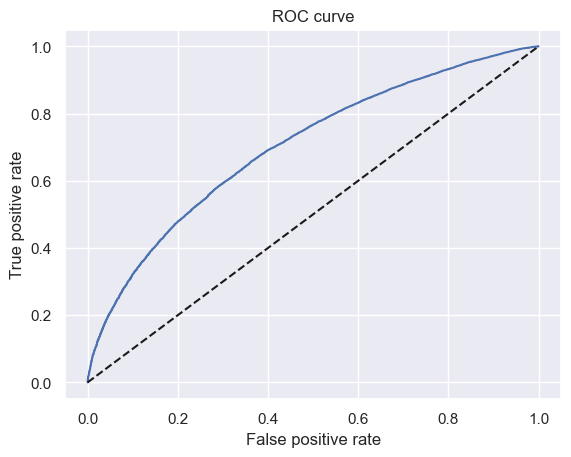

In [69]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [70]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])


In [71]:
AUROC

0.7018039229432221

### Gini and Kolmogorov-Smirnov

In [72]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')


In [73]:
df_actual_predicted_probs.head()

loan_data_targets_test  y_hat_test_proba  y_hat_test
42341                       1          0.378241           0
42344                       1          0.394498           0
39810                       0          0.396638           0
40518                       0          0.453803           0
42396                       0          0.454937           0

In [74]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()


In [75]:
df_actual_predicted_probs.head()

index  loan_data_targets_test  y_hat_test_proba  y_hat_test
0  42341                       1          0.378241           0
1  42344                       1          0.394498           0
2  39810                       0          0.396638           0
3  40518                       0          0.453803           0
4  42396                       0          0.454937           0

In [76]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()

In [77]:
df_actual_predicted_probs.head()

index  loan_data_targets_test  y_hat_test_proba  y_hat_test  \
0  42341                       1          0.378241           0   
1  42344                       1          0.394498           0   
2  39810                       0          0.396638           0   
3  40518                       0          0.453803           0   
4  42396                       0          0.454937           0   

   Cumulative N Population  Cumulative N Good  Cumulative N Bad  
0                        1                  1                 0  
1                        2                  2                 0  
2                        3                  2                 1  
3                        4                  2                 2  
4                        5                  2                 3

In [78]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
# We calculate the cumulative percentage of 'bad'.

In [79]:
df_actual_predicted_probs.head()

index  loan_data_targets_test  y_hat_test_proba  y_hat_test  \
0  42341                       1          0.378241           0   
1  42344                       1          0.394498           0   
2  39810                       0          0.396638           0   
3  40518                       0          0.453803           0   
4  42396                       0          0.454937           0   

   Cumulative N Population  Cumulative N Good  Cumulative N Bad  \
0                        1                  1                 0   
1                        2                  2                 0   
2                        3                  2                 1   
3                        4                  2                 2   
4                        5                  2                 3   

   Cumulative Perc Population  Cumulative Perc Good  Cumulative Perc Bad  
0                    0.000011              0.000012             0.000000  
1                    0.000021              0.000024             0.000000  
2                    0.000032              0.000024             0.000098  
3                    0.000043              0.000024             0.000196  
4                    0.000054              0.000024             0.000294

Text(0.5, 1.0, 'Gini')

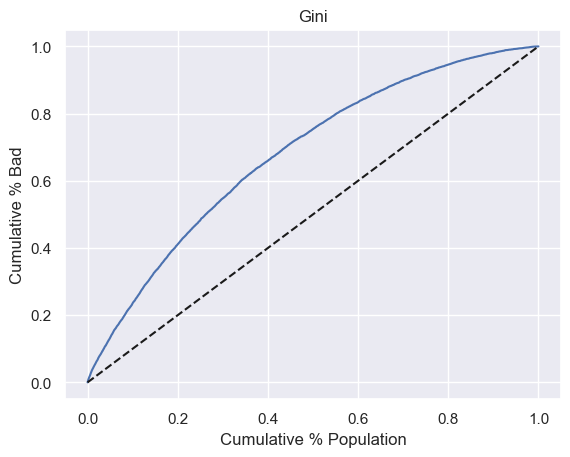

In [80]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')
# We name the graph "Gini".

In [81]:
Gini = AUROC * 2 - 1
# Here we calculate Gini from AUROC.
Gini

0.40360784588644427

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

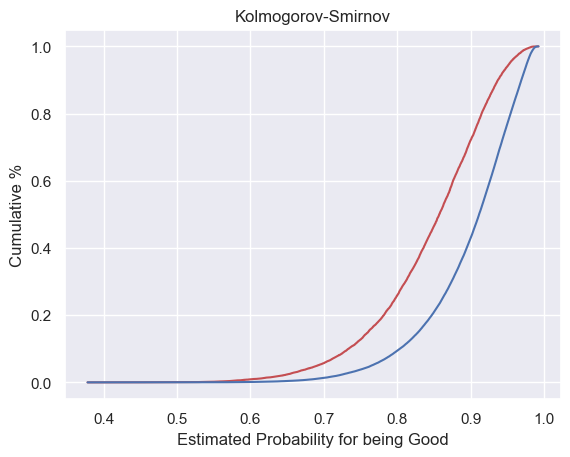

In [82]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov')
# We name the graph "Kolmogorov-Smirnov".

In [83]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

0.2945987509544686

# Applying the PD Model

### Calculating PD of individual accounts

In [84]:
pd.options.display.max_columns = None

In [85]:
inputs_test_with_ref_cat.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
362514    False    False     True    False    False    False    False   
288564    False    False    False    False     True    False    False   
213591    False    False     True    False    False    False    False   
263083    False    False     True    False    False    False    False   
165001     True    False    False    False    False    False    False   

        home_ownership:RENT_OTHER_NONE_ANY  home_ownership:OWN  \
362514                                   0               False   
288564                                   0               False   
213591                                   0               False   
263083                                   0               False   
165001                                   0               False   

        home_ownership:MORTGAGE  addr_state:ND_NE_IA_NV_FL_HI_AL  \
362514                     True                                0   
288564                     True                                0   
213591                     True                                0   
263083                     True                                0   
165001                     True                                0   

        addr_state:NM_VA  addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  \
362514                 0          False                             0   
288564                 0          False                             0   
213591                 0          False                             0   
263083                 0          False                             0   
165001                 0          False                             0   

        addr_state:CA  addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
362514           True                       0                          0   
288564          False                       0                          0   
213591          False                       1                          0   
263083          False                       0                          1   
165001          False                       0                          1   

        addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
362514                          0                    0                 0   
288564                          1                    0                 0   
213591                          0                    0                 0   
263083                          0                    0                 0   
165001                          0                    0                 0   

        addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
362514          False                 0                             0   
288564          False                 0                             0   
213591          False                 0                             0   
263083          False                 0                             0   
165001          False                 0                             0   

        addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
362514                             0                             False   
288564                             0                             False   
213591                             0                             False   
263083                             0                             False   
165001                             0                             False   

        verification_status:Source Verified  verification_status:Verified  \
362514                                False                          True   
288564                                False                          True   
213591                                False                          True   
263083                                 True                         False   
165001                                False                          True   

        purpose:educ__sm_b__wedd__ren_en__mov__house  purpose:c

In [86]:
summary_table

Feature name  Coefficients       p_values
0                             Intercept     -1.367129            NaN
1                               grade:A      1.138835   2.769605e-36
2                               grade:B      0.889251   5.457939e-48
3                               grade:C      0.691568   1.925239e-34
4                               grade:D      0.500232   8.490833e-21
5                               grade:E      0.322848   8.446249e-12
6                               grade:F      0.134419   6.178433e-03
7                    home_ownership:OWN      0.093977   3.071835e-06
8               home_ownership:MORTGAGE      0.105745   6.149449e-17
9                      addr_state:NM_VA      0.032606   3.086865e-01
10                        addr_state:NY      0.052346   3.070659e-02
11         addr_state:OK_TN_MO_LA_MD_NC      0.055753   1.605068e-02
12                        addr_state:CA      0.059683   4.884590e-03
13               addr_state:UT_KY_AZ_NJ      0.073827   3.048068e-03
14            addr_state:AR_MI_PA_OH_MN      0.131495   5.328833e-09
15            addr_state:RI_MA_DE_SD_IN      0.096150   1.271885e-03
16                  addr_state:GA_WA_OR      0.182278   8.341154e-12
17                     addr_state:WI_MT      0.228567   1.449003e-06
18                        addr_state:TX      0.218995   3.498500e-17
19                     addr_state:IL_CT      0.258432   8.967310e-19
20         addr_state:KS_SC_CO_VT_AK_MS      0.315628   1.329593e-24
21         addr_state:WV_NH_WY_DC_ME_ID      0.515521   2.916465e-22
22     verification_status:Not Verified      0.084624   6.933112e-09
23  verification_status:Source Verified     -0.008869   5.087673e-01
24                  purpose:credit_card      0.304254   5.143230e-27
25           purpose:debt_consolidation      0.199629   1.601954e-14
26           purpose:oth__med__vacation      0.214149   5.740974e-12
27  purpose:major_purch__car__home_impr      0.266617   1.332091e-17
28                initial_list_status:w      0.055705   2.004474e-05
29                              term:36      0.078659   1.936495e-08
30                         emp_length:1      0.099326   1.281087e-04
31                       emp_length:2-4      0.125088   3.392091e-11
32                       emp_length:5-6      0.090070   2.563346e-05
33                       emp_length:7-9      0.059919   3.958665e-03
34                        emp_length:10      0.124574   1.387809e-11
35               mths_since_issue_d:<38      0.973668  3.437840e-182
36             mths_since_issue_d:38-39      0.797003   2.611384e-99
37             mths_since_issue_d:40-41      0.711379   3.894629e-95
38             mths_since_issue_d:42-48      0.528907   1.512093e-66
39             mths_since_issue_d:49-52      0.374365   2.219886e-30
40             mths_since_issue_d:53-64      0.128486   3.199389e-05
41             mths_since_issue_d:65-84     -0.078105   1.162838e-02
42                      int_rate:<9.548      0.868607   2.286006e-30
43                int_rate:9.548-12.025      0.546491   3.772116e-34
44                int_rate:12.025-15.74      0.299441   4.300011e-16
45                int_rate:15.74-20.281      0.111466   1.279530e-04
46  mths_since_earliest_cr_line:141-164      0.033611   1.648705e-01
47  mths_since_earliest_cr_line:165-247      0.033718   8.257877e-02
48  mths_since_earliest_cr_line:248-270      0.083933   1.249484e-03
49  mths_since_earliest_cr_line:271-352      0.116361   4.368365e-07
50     mths_since_earliest_cr_line:>352      0.119135   7.386823e-06
51                     inq_last_6mths:0      0.657848   7.696696e-14
52                   inq_last_6mths:1-2      0.512447   5.529113e-09
53                   inq_last_6mths:3-6      0.301817   6.445102e-04
54                   acc_now_delinq:>=1      0.191394   7.145207e-02
55                   annual_inc:20K-30K     -0.077270   6.620689e-02
56                   annual_inc:30K-40K     -0.013598   7.364993e-01
57                   annu

In [87]:
y_hat_test_proba

array([0.92034815, 0.86285942, 0.88616842, ..., 0.97655706, 0.9584902 ,
       0.9510694 ])

### Creating a Scorecard

In [88]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [89]:
df_re_categories = pd.DataFrame(ref_categories, columns = ["Feature name"])
df_re_categories["Coefficients"] = 0
df_re_categories["p_values"] = np.nan
df_re_categories

Feature name  Coefficients  p_values
0                                        grade:G             0       NaN
1             home_ownership:RENT_OTHER_NONE_ANY             0       NaN
2                addr_state:ND_NE_IA_NV_FL_HI_AL             0       NaN
3                   verification_status:Verified             0       NaN
4   purpose:educ__sm_b__wedd__ren_en__mov__house             0       NaN
5                          initial_list_status:f             0       NaN
6                                        term:60             0       NaN
7                                   emp_length:0             0       NaN
8                         mths_since_issue_d:>84             0       NaN
9                               int_rate:>20.281             0       NaN
10              mths_since_earliest_cr_line:<140             0       NaN
11                             inq_last_6mths:>6             0       NaN
12                              acc_now_delinq:0             0       NaN
13                               annual_inc:<20K             0       NaN
14                                       dti:>35             0       NaN
15                    mths_since_last_delinq:0-3             0       NaN
16                    mths_since_last_record:0-2             0       NaN

In [90]:
df_scorecard = pd.concat([summary_table, df_re_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.367129   
1        1                                       grade:A      1.138835   
2        2                                       grade:B      0.889251   
3        3                                       grade:C      0.691568   
4        4                                       grade:D      0.500232   
5        5                                       grade:E      0.322848   
6        6                                       grade:F      0.134419   
7        7                            home_ownership:OWN      0.093977   
8        8                       home_ownership:MORTGAGE      0.105745   
9        9                              addr_state:NM_VA      0.032606   
10      10                                 addr_state:NY      0.052346   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.055753   
12      12                                 addr_state:CA      0.059683   
13      13                        addr_state:UT_KY_AZ_NJ      0.073827   
14      14                     addr_state:AR_MI_PA_OH_MN      0.131495   
15      15                     addr_state:RI_MA_DE_SD_IN      0.096150   
16      16                           addr_state:GA_WA_OR      0.182278   
17      17                              addr_state:WI_MT      0.228567   
18      18                                 addr_state:TX      0.218995   
19      19                              addr_state:IL_CT      0.258432   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.315628   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.515521   
22      22              verification_status:Not Verified      0.084624   
23      23           verification_status:Source Verified     -0.008869   
24      24                           purpose:credit_card      0.304254   
25      25                    purpose:debt_consolidation      0.199629   
26      26                    purpose:oth__med__vacation      0.214149   
27      27           purpose:major_purch__car__home_impr      0.266617   
28      28                         initial_list_status:w      0.055705   
29      29                                       term:36      0.078659   
30      30                                  emp_length:1      0.099326   
31      31                                emp_length:2-4      0.125088   
32      32                                emp_length:5-6      0.090070   
33      33                                emp_length:7-9      0.059919   
34      34                                 emp_length:10      0.124574   
35      35                        mths_since_issue_d:<38      0.973668   
36      36                      mths_since_issue_d:38-39      0.797003   
37      37                      mths_since_issue_d:40-41      0.711379   
38      38                      mths_since_issue_d:42-48      0.528907   
39      39                      mths_since_issue_d:49-52      0.374365   
40      40                      mths_since_issue_d:53-64      0.128486   
41      41                      mths_since_issue_d:65-84     -0.078105   
42      42                               int_rate:<9.548      0.868607   
43      43                         int_rate:9.548-12.025      0.546491   
44      44                         int_rate:12.025-15.74      0.299441   
45      45                         int_rate:15.74-20.281      0.111466   
46      46           mths_since_earliest_cr_line:141-164      0.033611   
47      47           mths_since_earliest_cr_line:165-247      0.033718   
48      48           mths_since_earliest_cr_line:248-270      0.083933   
49      49           mths_since_earliest_cr_line:271-352      0.116361   
50      50              mths_since_earliest_cr_line:>352      0.119135   
51      51                              inq_last_6mths:0      0.657848   
52      52                            inq_last_6mths:1-2      0.512447   
53      5

In [91]:
df_scorecard["Original feature name"] = df_scorecard["Feature name"].str.split(":").str[0]
df_scorecard

index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.367129   
1        1                                       grade:A      1.138835   
2        2                                       grade:B      0.889251   
3        3                                       grade:C      0.691568   
4        4                                       grade:D      0.500232   
5        5                                       grade:E      0.322848   
6        6                                       grade:F      0.134419   
7        7                            home_ownership:OWN      0.093977   
8        8                       home_ownership:MORTGAGE      0.105745   
9        9                              addr_state:NM_VA      0.032606   
10      10                                 addr_state:NY      0.052346   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.055753   
12      12                                 addr_state:CA      0.059683   
13      13                        addr_state:UT_KY_AZ_NJ      0.073827   
14      14                     addr_state:AR_MI_PA_OH_MN      0.131495   
15      15                     addr_state:RI_MA_DE_SD_IN      0.096150   
16      16                           addr_state:GA_WA_OR      0.182278   
17      17                              addr_state:WI_MT      0.228567   
18      18                                 addr_state:TX      0.218995   
19      19                              addr_state:IL_CT      0.258432   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.315628   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.515521   
22      22              verification_status:Not Verified      0.084624   
23      23           verification_status:Source Verified     -0.008869   
24      24                           purpose:credit_card      0.304254   
25      25                    purpose:debt_consolidation      0.199629   
26      26                    purpose:oth__med__vacation      0.214149   
27      27           purpose:major_purch__car__home_impr      0.266617   
28      28                         initial_list_status:w      0.055705   
29      29                                       term:36      0.078659   
30      30                                  emp_length:1      0.099326   
31      31                                emp_length:2-4      0.125088   
32      32                                emp_length:5-6      0.090070   
33      33                                emp_length:7-9      0.059919   
34      34                                 emp_length:10      0.124574   
35      35                        mths_since_issue_d:<38      0.973668   
36      36                      mths_since_issue_d:38-39      0.797003   
37      37                      mths_since_issue_d:40-41      0.711379   
38      38                      mths_since_issue_d:42-48      0.528907   
39      39                      mths_since_issue_d:49-52      0.374365   
40      40                      mths_since_issue_d:53-64      0.128486   
41      41                      mths_since_issue_d:65-84     -0.078105   
42      42                               int_rate:<9.548      0.868607   
43      43                         int_rate:9.548-12.025      0.546491   
44      44                         int_rate:12.025-15.74      0.299441   
45      45                         int_rate:15.74-20.281      0.111466   
46      46           mths_since_earliest_cr_line:141-164      0.033611   
47      47           mths_since_earliest_cr_line:165-247      0.033718   
48      48           mths_since_earliest_cr_line:248-270      0.083933   
49      49           mths_since_earliest_cr_line:271-352      0.116361   
50      50              mths_since_earliest_cr_line:>352      0.119135   
51      51                              inq_last_6mths:0      0.657848   
52      52                            inq_last_6mths:1-2      0.512447   
53      5

In [93]:
min_score = 300
max_score = 850

In [94]:
df_scorecard.groupby("Original feature name")["Coefficients"].min()

Original feature name
Intercept                     -1.367129
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.077270
dti                            0.000000
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d            -0.078105
mths_since_last_delinq         0.000000
mths_since_last_record         0.000000
purpose                        0.000000
term                           0.000000
verification_status           -0.008869
Name: Coefficients, dtype: float64

In [95]:
min_sum_coef = df_scorecard.groupby("Original feature name")["Coefficients"].min().sum()
min_sum_coef

-1.5313729383888823

In [96]:
df_scorecard.groupby("Original feature name")["Coefficients"].max()

Original feature name
Intercept                     -1.367129
acc_now_delinq                 0.191394
addr_state                     0.515521
annual_inc                     0.559463
dti                            0.393405
emp_length                     0.125088
grade                          1.138835
home_ownership                 0.105745
initial_list_status            0.055705
inq_last_6mths                 0.657848
int_rate                       0.868607
mths_since_earliest_cr_line    0.119135
mths_since_issue_d             0.973668
mths_since_last_delinq         0.185568
mths_since_last_record         0.508990
purpose                        0.304254
term                           0.078659
verification_status            0.084624
Name: Coefficients, dtype: float64

In [97]:
max_sum_coef = df_scorecard.groupby("Original feature name")["Coefficients"].max().sum()
max_sum_coef

5.49937890378051

In [98]:
df_scorecard["Score - Calculation"] = df_scorecard["Coefficients"] * (max_score - min_score)/(max_sum_coef - min_sum_coef)

In [99]:
df_scorecard

index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.367129   
1        1                                       grade:A      1.138835   
2        2                                       grade:B      0.889251   
3        3                                       grade:C      0.691568   
4        4                                       grade:D      0.500232   
5        5                                       grade:E      0.322848   
6        6                                       grade:F      0.134419   
7        7                            home_ownership:OWN      0.093977   
8        8                       home_ownership:MORTGAGE      0.105745   
9        9                              addr_state:NM_VA      0.032606   
10      10                                 addr_state:NY      0.052346   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.055753   
12      12                                 addr_state:CA      0.059683   
13      13                        addr_state:UT_KY_AZ_NJ      0.073827   
14      14                     addr_state:AR_MI_PA_OH_MN      0.131495   
15      15                     addr_state:RI_MA_DE_SD_IN      0.096150   
16      16                           addr_state:GA_WA_OR      0.182278   
17      17                              addr_state:WI_MT      0.228567   
18      18                                 addr_state:TX      0.218995   
19      19                              addr_state:IL_CT      0.258432   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.315628   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.515521   
22      22              verification_status:Not Verified      0.084624   
23      23           verification_status:Source Verified     -0.008869   
24      24                           purpose:credit_card      0.304254   
25      25                    purpose:debt_consolidation      0.199629   
26      26                    purpose:oth__med__vacation      0.214149   
27      27           purpose:major_purch__car__home_impr      0.266617   
28      28                         initial_list_status:w      0.055705   
29      29                                       term:36      0.078659   
30      30                                  emp_length:1      0.099326   
31      31                                emp_length:2-4      0.125088   
32      32                                emp_length:5-6      0.090070   
33      33                                emp_length:7-9      0.059919   
34      34                                 emp_length:10      0.124574   
35      35                        mths_since_issue_d:<38      0.973668   
36      36                      mths_since_issue_d:38-39      0.797003   
37      37                      mths_since_issue_d:40-41      0.711379   
38      38                      mths_since_issue_d:42-48      0.528907   
39      39                      mths_since_issue_d:49-52      0.374365   
40      40                      mths_since_issue_d:53-64      0.128486   
41      41                      mths_since_issue_d:65-84     -0.078105   
42      42                               int_rate:<9.548      0.868607   
43      43                         int_rate:9.548-12.025      0.546491   
44      44                         int_rate:12.025-15.74      0.299441   
45      45                         int_rate:15.74-20.281      0.111466   
46      46           mths_since_earliest_cr_line:141-164      0.033611   
47      47           mths_since_earliest_cr_line:165-247      0.033718   
48      48           mths_since_earliest_cr_line:248-270      0.083933   
49      49           mths_since_earliest_cr_line:271-352      0.116361   
50      50              mths_since_earliest_cr_line:>352      0.119135   
51      51                              inq_last_6mths:0      0.657848   
52      52                            inq_last_6mths:1-2      0.512447   
53      5

In [102]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score

C:\Users\lin48\AppData\Local\Temp\ipykernel_16404\3479579332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


In [103]:
df_scorecard

index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.367129   
1        1                                       grade:A      1.138835   
2        2                                       grade:B      0.889251   
3        3                                       grade:C      0.691568   
4        4                                       grade:D      0.500232   
5        5                                       grade:E      0.322848   
6        6                                       grade:F      0.134419   
7        7                            home_ownership:OWN      0.093977   
8        8                       home_ownership:MORTGAGE      0.105745   
9        9                              addr_state:NM_VA      0.032606   
10      10                                 addr_state:NY      0.052346   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.055753   
12      12                                 addr_state:CA      0.059683   
13      13                        addr_state:UT_KY_AZ_NJ      0.073827   
14      14                     addr_state:AR_MI_PA_OH_MN      0.131495   
15      15                     addr_state:RI_MA_DE_SD_IN      0.096150   
16      16                           addr_state:GA_WA_OR      0.182278   
17      17                              addr_state:WI_MT      0.228567   
18      18                                 addr_state:TX      0.218995   
19      19                              addr_state:IL_CT      0.258432   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.315628   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.515521   
22      22              verification_status:Not Verified      0.084624   
23      23           verification_status:Source Verified     -0.008869   
24      24                           purpose:credit_card      0.304254   
25      25                    purpose:debt_consolidation      0.199629   
26      26                    purpose:oth__med__vacation      0.214149   
27      27           purpose:major_purch__car__home_impr      0.266617   
28      28                         initial_list_status:w      0.055705   
29      29                                       term:36      0.078659   
30      30                                  emp_length:1      0.099326   
31      31                                emp_length:2-4      0.125088   
32      32                                emp_length:5-6      0.090070   
33      33                                emp_length:7-9      0.059919   
34      34                                 emp_length:10      0.124574   
35      35                        mths_since_issue_d:<38      0.973668   
36      36                      mths_since_issue_d:38-39      0.797003   
37      37                      mths_since_issue_d:40-41      0.711379   
38      38                      mths_since_issue_d:42-48      0.528907   
39      39                      mths_since_issue_d:49-52      0.374365   
40      40                      mths_since_issue_d:53-64      0.128486   
41      41                      mths_since_issue_d:65-84     -0.078105   
42      42                               int_rate:<9.548      0.868607   
43      43                         int_rate:9.548-12.025      0.546491   
44      44                         int_rate:12.025-15.74      0.299441   
45      45                         int_rate:15.74-20.281      0.111466   
46      46           mths_since_earliest_cr_line:141-164      0.033611   
47      47           mths_since_earliest_cr_line:165-247      0.033718   
48      48           mths_since_earliest_cr_line:248-270      0.083933   
49      49           mths_since_earliest_cr_line:271-352      0.116361   
50      50              mths_since_earliest_cr_line:>352      0.119135   
51      51                              inq_last_6mths:0      0.657848   
52      52                            inq_last_6mths:1-2      0.512447   
53      5

In [104]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.367129   
1        1                                       grade:A      1.138835   
2        2                                       grade:B      0.889251   
3        3                                       grade:C      0.691568   
4        4                                       grade:D      0.500232   
5        5                                       grade:E      0.322848   
6        6                                       grade:F      0.134419   
7        7                            home_ownership:OWN      0.093977   
8        8                       home_ownership:MORTGAGE      0.105745   
9        9                              addr_state:NM_VA      0.032606   
10      10                                 addr_state:NY      0.052346   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.055753   
12      12                                 addr_state:CA      0.059683   
13      13                        addr_state:UT_KY_AZ_NJ      0.073827   
14      14                     addr_state:AR_MI_PA_OH_MN      0.131495   
15      15                     addr_state:RI_MA_DE_SD_IN      0.096150   
16      16                           addr_state:GA_WA_OR      0.182278   
17      17                              addr_state:WI_MT      0.228567   
18      18                                 addr_state:TX      0.218995   
19      19                              addr_state:IL_CT      0.258432   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.315628   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.515521   
22      22              verification_status:Not Verified      0.084624   
23      23           verification_status:Source Verified     -0.008869   
24      24                           purpose:credit_card      0.304254   
25      25                    purpose:debt_consolidation      0.199629   
26      26                    purpose:oth__med__vacation      0.214149   
27      27           purpose:major_purch__car__home_impr      0.266617   
28      28                         initial_list_status:w      0.055705   
29      29                                       term:36      0.078659   
30      30                                  emp_length:1      0.099326   
31      31                                emp_length:2-4      0.125088   
32      32                                emp_length:5-6      0.090070   
33      33                                emp_length:7-9      0.059919   
34      34                                 emp_length:10      0.124574   
35      35                        mths_since_issue_d:<38      0.973668   
36      36                      mths_since_issue_d:38-39      0.797003   
37      37                      mths_since_issue_d:40-41      0.711379   
38      38                      mths_since_issue_d:42-48      0.528907   
39      39                      mths_since_issue_d:49-52      0.374365   
40      40                      mths_since_issue_d:53-64      0.128486   
41      41                      mths_since_issue_d:65-84     -0.078105   
42      42                               int_rate:<9.548      0.868607   
43      43                         int_rate:9.548-12.025      0.546491   
44      44                         int_rate:12.025-15.74      0.299441   
45      45                         int_rate:15.74-20.281      0.111466   
46      46           mths_since_earliest_cr_line:141-164      0.033611   
47      47           mths_since_earliest_cr_line:165-247      0.033718   
48      48           mths_since_earliest_cr_line:248-270      0.083933   
49      49           mths_since_earliest_cr_line:271-352      0.116361   
50      50              mths_since_earliest_cr_line:>352      0.119135   
51      51                              inq_last_6mths:0      0.657848   
52      52                            inq_last_6mths:1-2      0.512447   
53      5

In [105]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel

300.0

In [106]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
max_sum_score_prel

850.0

In [115]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']

### Caclulating Credit Score

In [107]:
inputs_test_with_ref_cat.head()

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
362514    False    False     True    False    False    False    False   
288564    False    False    False    False     True    False    False   
213591    False    False     True    False    False    False    False   
263083    False    False     True    False    False    False    False   
165001     True    False    False    False    False    False    False   

        home_ownership:RENT_OTHER_NONE_ANY  home_ownership:OWN  \
362514                                   0               False   
288564                                   0               False   
213591                                   0               False   
263083                                   0               False   
165001                                   0               False   

        home_ownership:MORTGAGE  addr_state:ND_NE_IA_NV_FL_HI_AL  \
362514                     True                                0   
288564                     True                                0   
213591                     True                                0   
263083                     True                                0   
165001                     True                                0   

        addr_state:NM_VA  addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  \
362514                 0          False                             0   
288564                 0          False                             0   
213591                 0          False                             0   
263083                 0          False                             0   
165001                 0          False                             0   

        addr_state:CA  addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
362514           True                       0                          0   
288564          False                       0                          0   
213591          False                       1                          0   
263083          False                       0                          1   
165001          False                       0                          1   

        addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
362514                          0                    0                 0   
288564                          1                    0                 0   
213591                          0                    0                 0   
263083                          0                    0                 0   
165001                          0                    0                 0   

        addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
362514          False                 0                             0   
288564          False                 0                             0   
213591          False                 0                             0   
263083          False                 0                             0   
165001          False                 0                             0   

        addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
362514                             0                             False   
288564                             0                             False   
213591                             0                             False   
263083                             0                             False   
165001                             0                             False   

        verification_status:Source Verified  verification_status:Verified  \
362514                                False                          True   
288564                                False                          True   
213591                                False                          True   
263083                                 True                         False   
165001                                False                          True   

        purpose:educ__sm_b__wedd__ren_en__mov__house  purpose:c

In [108]:
df_scorecard

index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.367129   
1        1                                       grade:A      1.138835   
2        2                                       grade:B      0.889251   
3        3                                       grade:C      0.691568   
4        4                                       grade:D      0.500232   
5        5                                       grade:E      0.322848   
6        6                                       grade:F      0.134419   
7        7                            home_ownership:OWN      0.093977   
8        8                       home_ownership:MORTGAGE      0.105745   
9        9                              addr_state:NM_VA      0.032606   
10      10                                 addr_state:NY      0.052346   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.055753   
12      12                                 addr_state:CA      0.059683   
13      13                        addr_state:UT_KY_AZ_NJ      0.073827   
14      14                     addr_state:AR_MI_PA_OH_MN      0.131495   
15      15                     addr_state:RI_MA_DE_SD_IN      0.096150   
16      16                           addr_state:GA_WA_OR      0.182278   
17      17                              addr_state:WI_MT      0.228567   
18      18                                 addr_state:TX      0.218995   
19      19                              addr_state:IL_CT      0.258432   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.315628   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.515521   
22      22              verification_status:Not Verified      0.084624   
23      23           verification_status:Source Verified     -0.008869   
24      24                           purpose:credit_card      0.304254   
25      25                    purpose:debt_consolidation      0.199629   
26      26                    purpose:oth__med__vacation      0.214149   
27      27           purpose:major_purch__car__home_impr      0.266617   
28      28                         initial_list_status:w      0.055705   
29      29                                       term:36      0.078659   
30      30                                  emp_length:1      0.099326   
31      31                                emp_length:2-4      0.125088   
32      32                                emp_length:5-6      0.090070   
33      33                                emp_length:7-9      0.059919   
34      34                                 emp_length:10      0.124574   
35      35                        mths_since_issue_d:<38      0.973668   
36      36                      mths_since_issue_d:38-39      0.797003   
37      37                      mths_since_issue_d:40-41      0.711379   
38      38                      mths_since_issue_d:42-48      0.528907   
39      39                      mths_since_issue_d:49-52      0.374365   
40      40                      mths_since_issue_d:53-64      0.128486   
41      41                      mths_since_issue_d:65-84     -0.078105   
42      42                               int_rate:<9.548      0.868607   
43      43                         int_rate:9.548-12.025      0.546491   
44      44                         int_rate:12.025-15.74      0.299441   
45      45                         int_rate:15.74-20.281      0.111466   
46      46           mths_since_earliest_cr_line:141-164      0.033611   
47      47           mths_since_earliest_cr_line:165-247      0.033718   
48      48           mths_since_earliest_cr_line:248-270      0.083933   
49      49           mths_since_earliest_cr_line:271-352      0.116361   
50      50              mths_since_earliest_cr_line:>352      0.119135   
51      51                              inq_last_6mths:0      0.657848   
52      52                            inq_last_6mths:1-2      0.512447   
53      5

In [109]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [110]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [111]:
inputs_test_with_ref_cat_w_intercept.head()

Intercept  grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
362514          1    False    False     True    False    False    False   
288564          1    False    False    False    False     True    False   
213591          1    False    False     True    False    False    False   
263083          1    False    False     True    False    False    False   
165001          1     True    False    False    False    False    False   

        grade:G  home_ownership:RENT_OTHER_NONE_ANY  home_ownership:OWN  \
362514    False                                   0               False   
288564    False                                   0               False   
213591    False                                   0               False   
263083    False                                   0               False   
165001    False                                   0               False   

        home_ownership:MORTGAGE  addr_state:ND_NE_IA_NV_FL_HI_AL  \
362514                     True                                0   
288564                     True                                0   
213591                     True                                0   
263083                     True                                0   
165001                     True                                0   

        addr_state:NM_VA  addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  \
362514                 0          False                             0   
288564                 0          False                             0   
213591                 0          False                             0   
263083                 0          False                             0   
165001                 0          False                             0   

        addr_state:CA  addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
362514           True                       0                          0   
288564          False                       0                          0   
213591          False                       1                          0   
263083          False                       0                          1   
165001          False                       0                          1   

        addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
362514                          0                    0                 0   
288564                          1                    0                 0   
213591                          0                    0                 0   
263083                          0                    0                 0   
165001                          0                    0                 0   

        addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
362514          False                 0                             0   
288564          False                 0                             0   
213591          False                 0                             0   
263083          False                 0                             0   
165001          False                 0                             0   

        addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
362514                             0                             False   
288564                             0                             False   
213591                             0                             False   
263083                             0                             False   
165001                             0                             False   

        verification_status:Source Verified  verification_status:Verified  \
362514                                False                          True   
288564                                False                          True   
213591                                False                          True   
263083                                 True                         False   
165001                                False                          True  

In [112]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [113]:
inputs_test_with_ref_cat_w_intercept.head()

Intercept  grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
362514          1    False    False     True    False    False    False   
288564          1    False    False    False    False     True    False   
213591          1    False    False     True    False    False    False   
263083          1    False    False     True    False    False    False   
165001          1     True    False    False    False    False    False   

        home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
362514               False                     True                 0   
288564               False                     True                 0   
213591               False                     True                 0   
263083               False                     True                 0   
165001               False                     True                 0   

        addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  addr_state:CA  \
362514          False                             0           True   
288564          False                             0          False   
213591          False                             0          False   
263083          False                             0          False   
165001          False                             0          False   

        addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
362514                       0                          0   
288564                       0                          0   
213591                       1                          0   
263083                       0                          1   
165001                       0                          1   

        addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
362514                          0                    0                 0   
288564                          1                    0                 0   
213591                          0                    0                 0   
263083                          0                    0                 0   
165001                          0                    0                 0   

        addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
362514          False                 0                             0   
288564          False                 0                             0   
213591          False                 0                             0   
263083          False                 0                             0   
165001          False                 0                             0   

        addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
362514                             0                             False   
288564                             0                             False   
213591                             0                             False   
263083                             0                             False   
165001                             0                             False   

        verification_status:Source Verified  purpose:credit_card  \
362514                                False                False   
288564                                False                 True   
213591                                False                False   
263083                                 True                False   
165001                                False                False   

        purpose:debt_consolidation  purpose:oth__med__vacation  \
362514                       False                           0   
288564                       False                           0   
213591                        True                           0   
263083                        True                           0   
165001                        True                           0   

        purpose:major_purch__car__home_impr  initial_list_status:w  term:36  \
362514                                    1                  False        0   
288564                   

In [116]:
scorecard_scores = df_scorecard['Score - Final']

In [117]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 102)

In [118]:
scorecard_scores.shape

(102,)

In [119]:
scorecard_scores = scorecard_scores.values.reshape(102, 1)

In [120]:
scorecard_scores.shape

(102, 1)

In [121]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [122]:
y_scores.head()

0
362514  612.0
288564  564.0
213591  580.0
263083  628.0
165001  685.0

In [123]:
y_scores.tail()

0
115     573.0
296284  691.0
61777   711.0
91763   665.0
167512  653.0

### From Credit Score to PD

In [124]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [130]:
sum_coef_from_score = sum_coef_from_score.astype(float)

In [131]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)

In [132]:
y_hat_proba_from_score.head()

0
362514  0.921070
288564  0.863349
213591  0.885737
263083  0.934717
165001  0.967395

In [133]:
y_hat_test_proba[0: 5]

array([0.92034815, 0.86285942, 0.88616842, 0.93532906, 0.96772705])

### Setting Cut-offs

In [135]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [136]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted      0      1
Actual                 
0           7361   2829
1          35786  47281

In [137]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted         0         1
Actual                       
0          0.078932  0.030336
1          0.383735  0.506997

In [138]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5859292063866519

In [139]:
from sklearn.metrics import roc_curve, roc_auc_score

In [140]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99960746, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.92615599e-04, ...,
        9.99975923e-01, 9.99975923e-01, 1.00000000e+00]),
 array([       inf, 0.99194446, 0.9902417 , ..., 0.49039009, 0.39663847,
        0.37824115]))

In [141]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

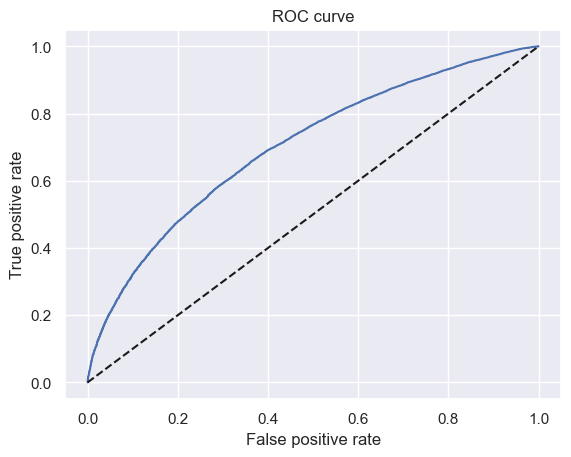

In [143]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [144]:
thresholds

array([       inf, 0.99194446, 0.9902417 , ..., 0.49039009, 0.39663847,
       0.37824115])

In [145]:
thresholds.shape

(17323,)

In [146]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)


In [147]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']


In [148]:
df_cutoffs.head()

thresholds       fpr       tpr
0         inf  0.000000  0.000000
1    0.991944  0.000000  0.000012
2    0.990242  0.000000  0.000193
3    0.990212  0.000098  0.000193
4    0.989752  0.000098  0.000289

In [149]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)


In [150]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()


In [151]:
df_cutoffs.head()

thresholds       fpr       tpr   Score
0    1.000000  0.000000  0.000000  2090.0
1    0.991944  0.000000  0.000012   796.0
2    0.990242  0.000000  0.000193   781.0
3    0.990212  0.000098  0.000193   781.0
4    0.989752  0.000098  0.000289   777.0

In [152]:
df_cutoffs['Score'][0] = max_score

In [153]:
df_cutoffs.head()

thresholds       fpr       tpr  Score
0    1.000000  0.000000  0.000000  850.0
1    0.991944  0.000000  0.000012  796.0
2    0.990242  0.000000  0.000193  781.0
3    0.990212  0.000098  0.000193  781.0
4    0.989752  0.000098  0.000289  777.0

In [154]:
df_cutoffs.tail()

thresholds       fpr       tpr  Score
17318    0.498425  0.999411  0.999964  419.0
17319    0.491792  0.999607  0.999964  417.0
17320    0.490390  0.999607  0.999976  417.0
17321    0.396638  1.000000  0.999976  387.0
17322    0.378241  1.000000  1.000000  381.0

In [155]:
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [156]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']


In [157]:
df_cutoffs.head()

thresholds       fpr       tpr  Score  N Approved  N Rejected  \
0    1.000000  0.000000  0.000000  850.0           0       93257   
1    0.991944  0.000000  0.000012  796.0           1       93256   
2    0.990242  0.000000  0.000193  781.0          16       93241   
3    0.990212  0.000098  0.000193  781.0          17       93240   
4    0.989752  0.000098  0.000289  777.0          25       93232   

   Approval Rate  Rejection Rate  
0       0.000000        1.000000  
1       0.000011        0.999989  
2       0.000172        0.999828  
3       0.000182        0.999818  
4       0.000268        0.999732

In [158]:
df_cutoffs.tail()

thresholds       fpr       tpr  Score  N Approved  N Rejected  \
17318    0.498425  0.999411  0.999964  419.0       93248           9   
17319    0.491792  0.999607  0.999964  417.0       93250           7   
17320    0.490390  0.999607  0.999976  417.0       93251           6   
17321    0.396638  1.000000  0.999976  387.0       93255           2   
17322    0.378241  1.000000  1.000000  381.0       93257           0   

       Approval Rate  Rejection Rate  
17318       0.999903        0.000097  
17319       0.999925        0.000075  
17320       0.999936        0.000064  
17321       0.999979        0.000021  
17322       1.000000        0.000000

In [159]:
df_cutoffs.iloc[5000: 6200, ]


thresholds       fpr       tpr  Score  N Approved  N Rejected  \
5000    0.904273  0.257409  0.542971  595.0       47726       45531   
5001    0.904269  0.257507  0.542971  595.0       47727       45530   
5002    0.904249  0.257507  0.543104  595.0       47738       45519   
5003    0.904248  0.257605  0.543104  595.0       47739       45518   
5004    0.904246  0.257605  0.543128  595.0       47741       45516   
5005    0.904245  0.257704  0.543128  595.0       47742       45515   
5006    0.904208  0.257704  0.543308  595.0       47757       45500   
5007    0.904204  0.257802  0.543308  595.0       47758       45499   
5008    0.904181  0.257802  0.543405  595.0       47766       45491   
5009    0.904178  0.257900  0.543405  595.0       47767       45490   
5010    0.904151  0.257900  0.543561  595.0       47780       45477   
5011    0.904147  0.257998  0.543561  595.0       47781       45476   
5012    0.904143  0.257998  0.543609  595.0       47785       45472   
5013    0.904143  0.258096  0.543609  595.0       47786       45471   
5014    0.904137  0.258096  0.543658  595.0       47790       45467   
5015    0.904135  0.258194  0.543670  595.0       47792       45465   
5016    0.904098  0.258194  0.543922  595.0       47813       45444   
5017    0.904098  0.258292  0.543922  595.0       47814       45443   
5018    0.904092  0.258292  0.543983  595.0       47819       45438   
5019    0.904090  0.258391  0.543983  595.0       47820       45437   
5020    0.904039  0.258391  0.544284  595.0       47845       45412   
5021    0.904036  0.258587  0.544284  595.0       47847       45410   
5022    0.904022  0.258587  0.544440  595.0       47860       45397   
5023    0.904020  0.258685  0.544440  595.0       47861       45396   
5024    0.903992  0.258685  0.544669  595.0       47880       45377   
5025    0.903989  0.258783  0.544669  595.0       47881       45376   
5026    0.903981  0.258783  0.544717  595.0       47885       45372   
5027    0.903981  0.258881  0.544717  595.0       47886       45371   
5028    0.903979  0.258881  0.544753  595.0       47889       45368   
5029    0.903969  0.259078  0.544753  595.0       47891       45366   
5030    0.903964  0.259078  0.544777  595.0       47893       45364   
5031    0.903962  0.259176  0.544777  595.0       47894       45363   
5032    0.903949  0.259176  0.544922  595.0       47906       45351   
5033    0.903948  0.259274  0.544922  595.0       47907       45350   
5034    0.903931  0.259274  0.545042  595.0       47917       45340   
5035    0.903927  0.259372  0.545042  595.0       47918       45339   
5036    0.903920  0.259372  0.545090  595.0       47922       45335   
5037    0.903911  0.259764  0.545090  595.0       47926       45331   
5038    0.903864  0.259764  0.545367  595.0       47949       45308   
5039    0.903864  0.259863  0.545367  595.0       47950       45307   
5040    0.903861  0.259863  0.545391  595.0       47952       45305   
5041    0.903860  0.259961  0.545391  595.0       47953       45304   
5042    0.903853  0.259961  0.545439  595.0       47957       45300   
5043    0.903851  0.260059  0.545439  595.0       47958       45299   
5044    0.903841  0.260059  0.545536  595.0       47966       45291   
5045    0.903840  0.260255  0.545536  595.0       47968       45289   
5046    0.903827  0.260255  0.545668  595.0       47979       45278   
5047    0.903825  0.260353  0.545668  595.0       47980       45277   
5048    0.903790  0.260353  0.545909  595.0       48000       45257   
5049    0.903787  0.260451  0.545909  595.0       48001       45256   
5050    0.903784  0.260451  0.545957  595.0       48005       45252   
5051    0.903783  0.260550  0.545957  595.0       48006       45251   
5052    0.903768  0.260550  0.546029  595.0       48012       45245   
5053    0.903767  0.260746  0.546029  595.0       48014       45243   
5054    0.903697  0.260746  0.546487  595.0       48052       45205   
5055    0.903696  0.260844  0.

In [160]:
df_cutoffs.iloc[1000: 2000, ]


thresholds       fpr       tpr  Score  N Approved  N Rejected  \
1000    0.953302  0.048577  0.204823  656.0       17509       75748   
1001    0.953278  0.048577  0.204919  656.0       17517       75740   
1002    0.953278  0.048675  0.204919  656.0       17518       75739   
1003    0.953257  0.048675  0.205015  656.0       17526       75731   
1004    0.953252  0.048871  0.205015  656.0       17528       75729   
1005    0.953227  0.048871  0.205124  656.0       17537       75720   
1006    0.953224  0.048970  0.205124  656.0       17538       75719   
1007    0.953136  0.048970  0.205774  655.0       17592       75665   
1008    0.953135  0.049068  0.205774  655.0       17593       75664   
1009    0.953108  0.049068  0.205942  655.0       17607       75650   
1010    0.953106  0.049166  0.205942  655.0       17608       75649   
1011    0.953062  0.049166  0.206315  655.0       17639       75618   
1012    0.953061  0.049264  0.206315  655.0       17640       75617   
1013    0.952977  0.049264  0.206821  655.0       17682       75575   
1014    0.952976  0.049362  0.206821  655.0       17683       75574   
1015    0.952958  0.049362  0.206905  655.0       17690       75567   
1016    0.952949  0.049460  0.206905  655.0       17691       75566   
1017    0.952947  0.049460  0.206917  655.0       17692       75565   
1018    0.952945  0.049558  0.206917  655.0       17693       75564   
1019    0.952945  0.049558  0.206929  655.0       17694       75563   
1020    0.952944  0.049657  0.206929  655.0       17695       75562   
1021    0.952929  0.049657  0.207074  655.0       17707       75550   
1022    0.952924  0.049755  0.207074  655.0       17708       75549   
1023    0.952859  0.049755  0.207531  655.0       17746       75511   
1024    0.952856  0.049853  0.207531  655.0       17747       75510   
1025    0.952835  0.049853  0.207676  655.0       17759       75498   
1026    0.952833  0.049951  0.207676  655.0       17760       75497   
1027    0.952784  0.049951  0.208097  655.0       17795       75462   
1028    0.952784  0.050049  0.208097  655.0       17796       75461   
1029    0.952766  0.050049  0.208242  655.0       17808       75449   
1030    0.952765  0.050147  0.208242  655.0       17809       75448   
1031    0.952753  0.050147  0.208338  655.0       17817       75440   
1032    0.952743  0.050245  0.208338  655.0       17818       75439   
1033    0.952646  0.050245  0.209120  655.0       17883       75374   
1034    0.952642  0.050343  0.209120  655.0       17884       75373   
1035    0.952615  0.050343  0.209361  655.0       17904       75353   
1036    0.952613  0.050540  0.209361  655.0       17906       75351   
1037    0.952591  0.050540  0.209494  655.0       17917       75340   
1038    0.952591  0.050638  0.209494  655.0       17918       75339   
1039    0.952586  0.050638  0.209602  655.0       17927       75330   
1040    0.952586  0.050736  0.209602  655.0       17928       75329   
1041    0.952584  0.050736  0.209614  654.0       17929       75328   
1042    0.952582  0.050834  0.209614  654.0       17930       75327   
1043    0.952574  0.050834  0.209662  654.0       17934       75323   
1044    0.952568  0.050932  0.209662  654.0       17935       75322   
1045    0.952565  0.050932  0.209686  654.0       17937       75320   
1046    0.952565  0.051030  0.209686  654.0       17938       75319   
1047    0.952546  0.051030  0.209831  654.0       17950       75307   
1048    0.952545  0.051227  0.209831  654.0       17952       75305   
1049    0.952511  0.051227  0.210071  654.0       17972       75285   
1050    0.952510  0.051325  0.210071  654.0       17973       75284   
1051    0.952495  0.051325  0.210192  654.0       17983       75274   
1052    0.952487  0.051521  0.210192  654.0       17985       75272   
1053    0.952457  0.051521  0.210457  654.0       18007       75250   
1054    0.952457  0.051521  0.210481  654.0       18009       75248   
1055    0.952327  0.051521  0.

In [161]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [162]:
df_scorecard.to_csv('df_scorecard.csv')